# <div style="text-align: center"> Support Vector Machine </div>
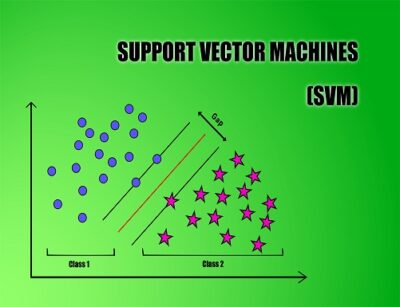

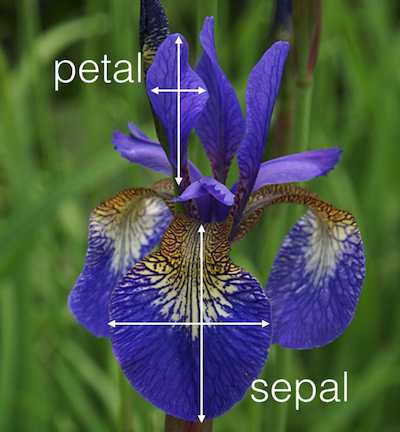

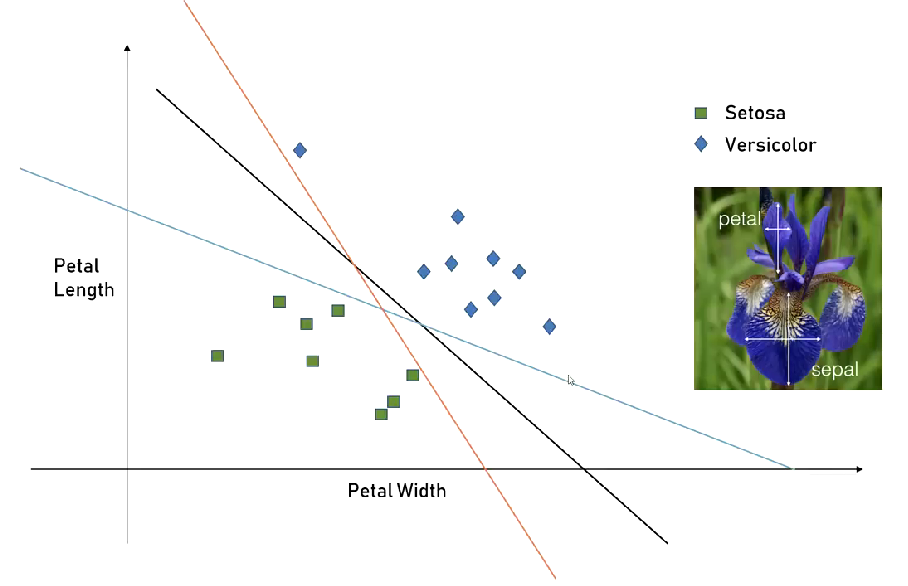

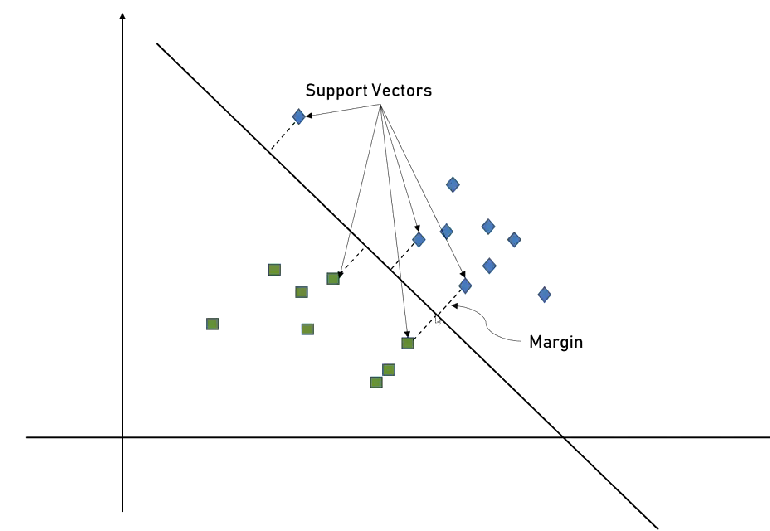

**The line with higher margin is better because it classifies these 2 groups in a better way.**

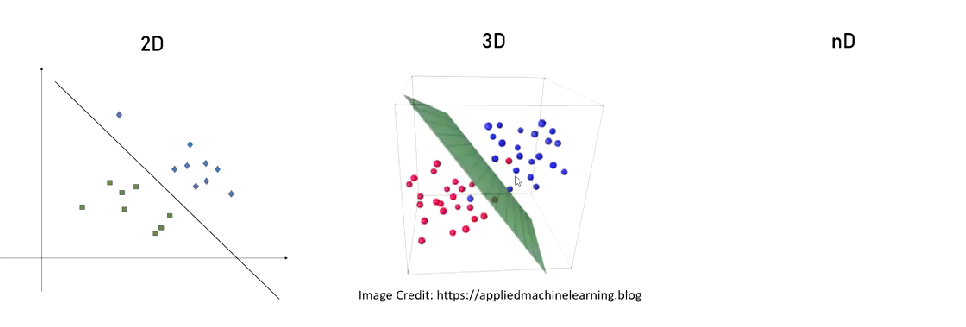

## What is Support vector machine?
<div style='text-align:justify'>Support vector machine draws a hyper plane in n dimentional space such that it maximizes margin between classification groups.
    </div>

## Gamma & Regularization

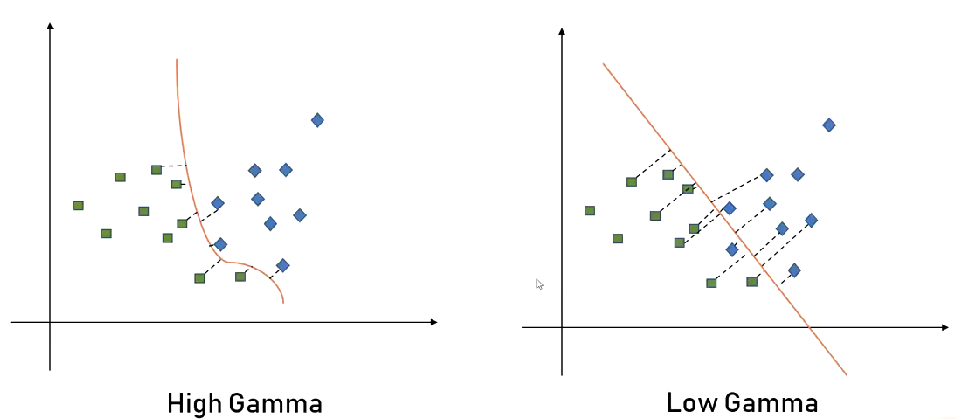

High Gamma: The decision boundary considered the data point which are very near to it.<br>
Low Gamma: The decision boundary considered the data point which are very far to it. (more accuracy, more efficient)  

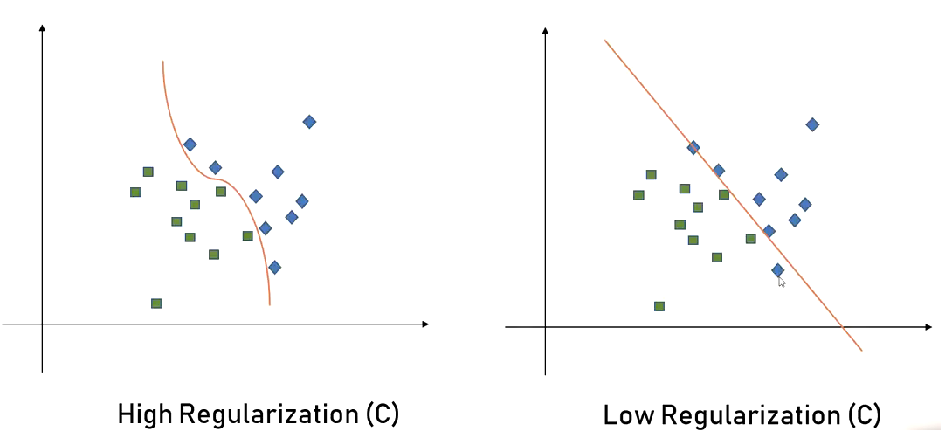

High Regularization: use for very complex data set, line is very zigzag.<br>
Low Regularization: accept some errors, line is more smmother. 

## You might have a very complex dataset like this!!!
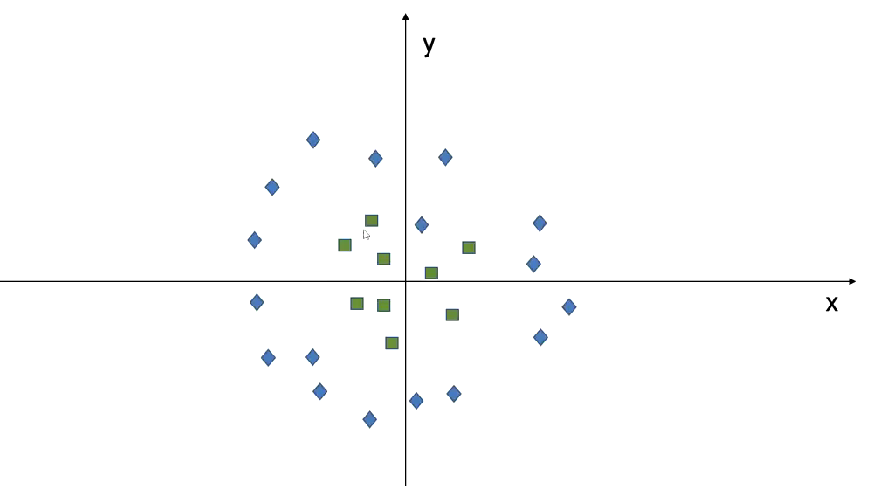

One approcal to deal with this dataset is to create a third dimention(z).

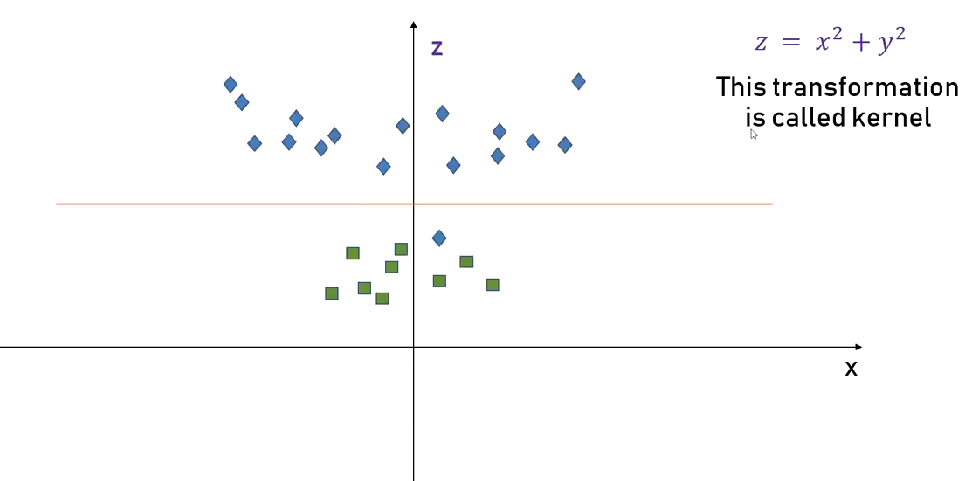

## Implement SVM By Python

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
#create a new dataframe based on iris feature names
df=pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# append a target varible into my df
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

**The meaning & labling of target names: 0=setosa;1=versicolor;2=virginica**

In [10]:
## which rows are 1?
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [11]:
len(df[df.target==1])

50

In [12]:
len(df[df.target==2])

50

In [13]:
len(df[df.target==0])

50

In [14]:
# create flower_name columns from target clomun by using apply function
# by using this code the value of target is returned
df['flower_name']= df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Data Visualization

In [16]:
from matplotlib import pyplot as plt
%matplotlib inline

In [17]:
# Separate 3 dataframes
df0 = df[df.target==0]
df1 = df[df.target==1]
df2=df[df.target==2]

In [18]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [19]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


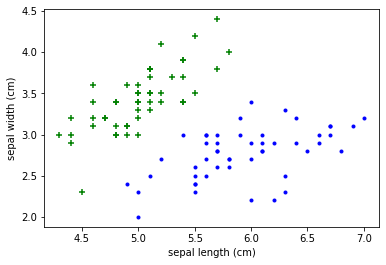

In [21]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='green',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='.')

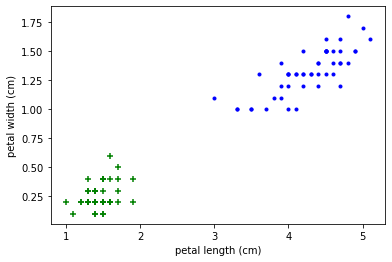

In [22]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='.')

In [23]:
from sklearn.model_selection import train_test_split

In [26]:
X = df.drop(['target','flower_name'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [28]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8)

In [30]:
len(X_train)

120

In [31]:
len(X_test)

30

In [34]:
from sklearn.svm import SVC
model = SVC()

In [35]:
model.fit(X_train,y_train)

SVC()

In [36]:
model.score(X_test,y_test)

0.9666666666666667

In [62]:
# IF I increase gamma what happen to my score?
from sklearn.svm import SVC
model = SVC(gamma=10)

In [63]:
model.fit(X_train,y_train)

SVC(gamma=10)

In [64]:
model.score(X_test,y_test)

0.9

**Increasing gamma reduce my score.**

In [77]:
# What happen if I increase regularization
from sklearn.svm import SVC
model = SVC(C=200)

In [78]:
model.fit(X_train,y_train)

SVC(C=200)

In [79]:
model.score(X_test,y_test)

0.9666666666666667

**Normally increasing C (regularization) decrease the accuracy.**

In [80]:
# What happen if I change the kernel
from sklearn.svm import SVC
model = SVC(kernel='linear')

In [81]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [82]:
model.score(X_test,y_test)

1.0

|  Date |  Author |   |   |
|---|---|---|---|
| 2021-09-18    |   <font color=blue>**Ehsan Zia**</font>  |  |  |

